# Lasso regression from scratch
*Subgradient method implementation in Python*

## Problem statement 

Let’s assume we have N people/observations, each person has M features. We are given:

A matrix $𝑋$ is $\mathbb{R}^{N\times M}$. $X_{ij}$ represents person i with feature j.

A vector $y$ is $\mathbb{R}^{N}$. $y_{i}$ represents the output of person i.

We expect y is a linear combination of features in X and we want to find out the relationship between X and y. If y is continous, we know that this is just a linear regression problem that tries to solve w for $y = Xw + b$. 


## Goal

There are many approaches to solve the linear regression problem. The most basic approach Ordinary Least Squares tries to minimize $\min_w \|{Xw-y}\|_2^2$. Ridge regression adds a L2 regularization term on the weights $\min_w \left[\|{Xw-y}\|_2^2 + \alpha \|{w}\|_2^2\right]$


Lasso regression adds a L1 regularization term on the weights $\min_w \left[\|{Xw-y}\|_2^2 + \alpha \|{w}\|_1 \right]$. The first term $\|{Xw-y}\|_2^2$ is smooth, convex, and differentiable. The second term,  $\|{w}\|_1$ ,however, is not smooth and not differentiable. Therefore, we can't use gradient descent method on Lasso directly. There are lots of fun methods for minimizing this issue. This article will walk though the easiest subgradient method for solving this problem.

## Subgradient method

The easiest way to optimize Lasso regression is to use the subgradient method. What is subgradient? Here is an explanation from [wikipidia](https://en.wikipedia.org/wiki/Subderivative): 

*In mathematics, the subderivative, subgradient, and subdifferential generalize the derivative to convex functions which are not necessarily differentiable.*

Let $ f(z) = |z| $ and let's calculate the subdifferential, all the subgradients, of f at w:

$\partial f(z) = \begin{equation}
    \begin{cases}
      -1 & \text{if $z$ < 0}\\
      1 & \text{if $z$ > 0}\\
      [-1,1] & \text{if $z$ = 0}
    \end{cases}       
\end{equation}$

We can see that $ sign(z) \in \partial f(z) $, sign(z) is one of the subgradient of f at z.


Then for the L1 norm of vector w:

$
sign(w) =
\begin{pmatrix}
sign(w_1)\\
sign(w_2)\\
...
\end{pmatrix} \in \partial \|{w}\|_1 = \begin{pmatrix}
\partial |w_1|\\
\partial |w_2|\\
...
\end{pmatrix} $

Therefore, for the Lasso loss function: loss = $\|{Xw-y}\|_2^2 + \alpha \|{w}\|_1$, the subgradient can be written as: $X^T(Xw-y) + \alpha * sign(w)$




In [54]:
import numpy as np 
import pandas as pd

def loss_subgradient(X, w, y, alpha):
    z = X @ w - y
    # calculate loss 
    loss = np.linalg.norm(z)**2 + alpha * np.linalg.norm(w, ord=1)
    # calculate subgradient
    subgradient = X.T @ z + alpha * np.sign(w)
    return loss, subgradient

In [55]:
def subgradient_method(X, y, max_iter=1000, eta=0.1, alpha=0.1):
    w = np.zeros(X.shape[1])
    step = 0
    step_lst = []
    loss_lst = []
    w_lst = []
    while step < max_iter:
        step += 1
        loss, subgradient = loss_subgradient(X, w, y, alpha)
        w -= eta * subgradient
        step_lst.append(step)
        w_lst.append(w)
        loss_lst.append(loss)

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, w
    

In [56]:
class LassoSubgradient:
    def fit(self, X, y):
        self.loss_steps, self.w = subgradient_method(X, y)
        
    def loss_plot(self):
        return self.loss_steps.plot(
            x='step',
            y='loss',
            xlabel='step',
            ylabel='loss'
        )
    def predict(self, H):
        # H: new data
        return H @ self.w
        

In [62]:
X = np.array([[0,0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])
X, y

(array([[0, 0],
        [1, 1],
        [2, 2]]),
 array([0, 1, 2]))

In [63]:
model = LassoSubgradient()
model.fit(X, y)

<AxesSubplot:xlabel='step', ylabel='loss'>

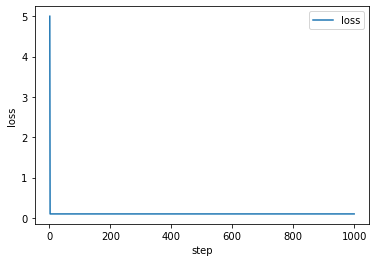

In [64]:
model.loss_plot()

In [68]:
model.w

array([0.49, 0.49])

In [67]:
model.predict(np.array([1, 1]))

0.98

In [70]:
from sklearn import linear_model

In [75]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.predict([[1, 1]])
reg.coef_

array([0.85, 0.  ])

In [78]:
reg.intercept_

0.15000000000000002

## Benefit of L1 regularization


xxx resulting in more 0s

This article went through the basic subgradient method in solving Lasso regression. There are other more interesting methods such as proxima gradient method, accelerate proximal gradient method, and Frank-Wolfe method. I might write more about those different methods later. 